### **Implementation of ResNet-18**
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rsarka34/NPTEL-Deep-Learning-Hands-on-NOC24EE04-/blob/main/ConvNets/ResNet18.ipynb)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Add
from keras.utils import to_categorical
from keras.optimizers import Adam
import tensorflow as tf

### **MNIST data load**

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data preprocessing
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


11490434/11490434 [==============================] - 2s 0us/step


### **Residual block construction**
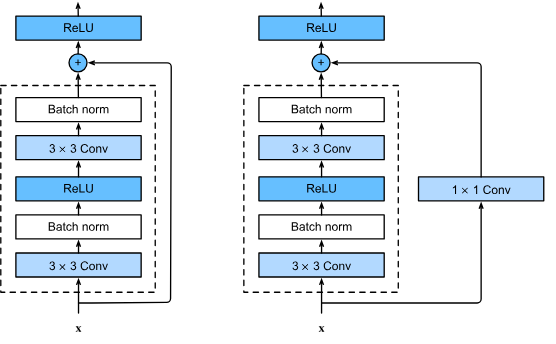

In [3]:
# Residual block
def residual_block(inputs, filters, strides=(1, 1)):
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    if strides != (1, 1):
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(inputs)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = inputs
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

### **ResNet18 model creation**

In [4]:
# ResNet-18 architecture
def ResNet18(input_shape=(28, 28, 1), num_classes=10):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)
    x = residual_block(x, 128, strides=(2, 2))
    x = residual_block(x, 128)
    x = residual_block(x, 256, strides=(2, 2))
    x = residual_block(x, 256)
    x = residual_block(x, 512, strides=(2, 2))
    x = residual_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Create ResNet-18 model
model = ResNet18()

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 14, 14, 64)           3200      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 14, 14, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 14, 14, 64)           0         ['batch_normalization[0][0

In [5]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
375/375 [==============================] - 36s 34ms/step - loss: 0.1606 - accuracy: 0.9544 - val_loss: 4.8669 - val_accuracy: 0.2927
Epoch 2/10
375/375 [==============================] - 11s 31ms/step - loss: 0.0554 - accuracy: 0.9828 - val_loss: 0.0650 - val_accuracy: 0.9804
Epoch 3/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 1.2098 - val_accuracy: 0.7788
Epoch 4/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0485 - val_accuracy: 0.9857
Epoch 5/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0614 - val_accuracy: 0.9826
Epoch 6/10
375/375 [==============================] - 13s 35ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0635 - val_accuracy: 0.9828
Epoch 7/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.0567 - val_accuracy:

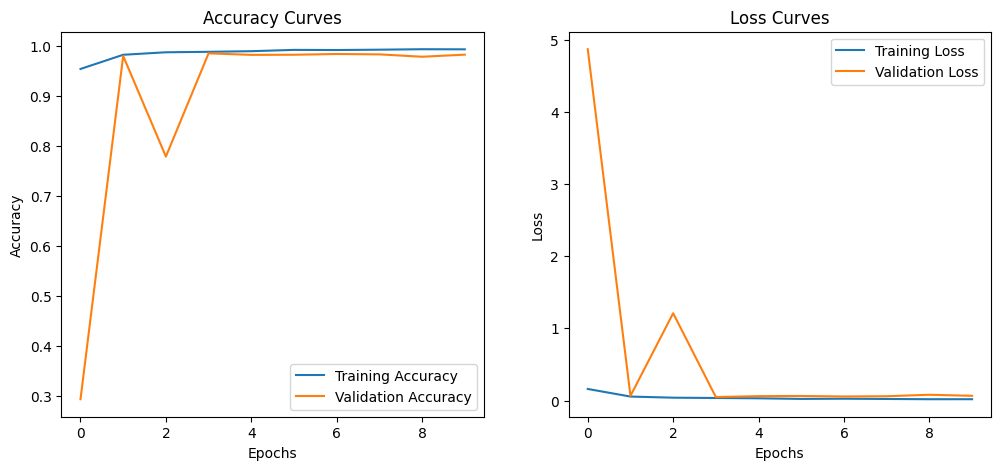

In [6]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.0612
Test Accuracy: 0.9824


313/313 [==============================] - 3s 8ms/step


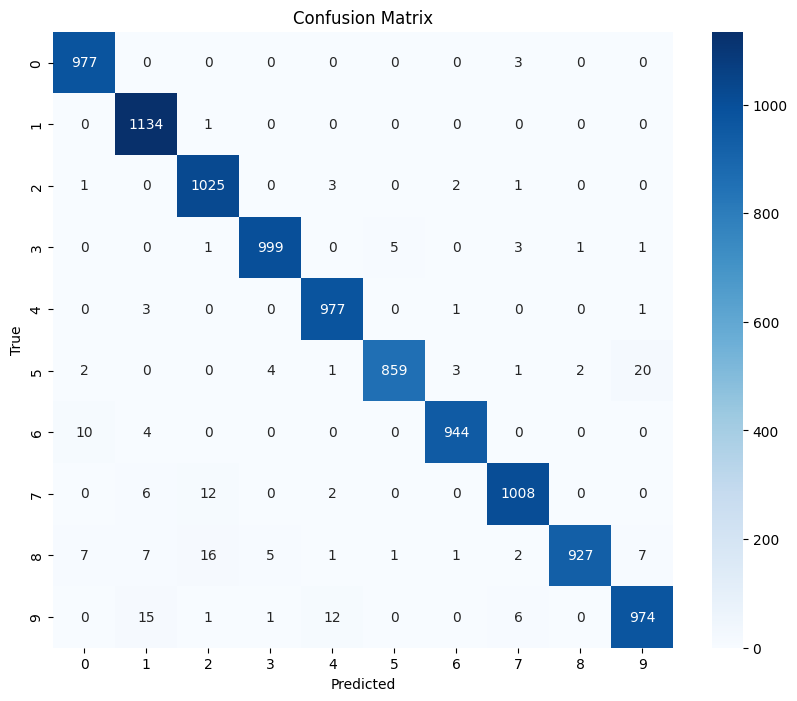

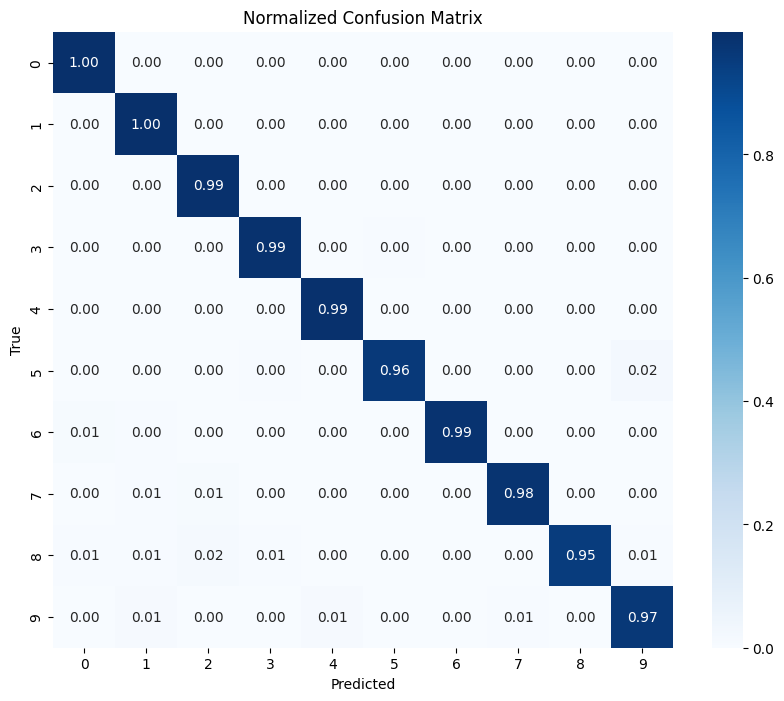

In [8]:
# Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

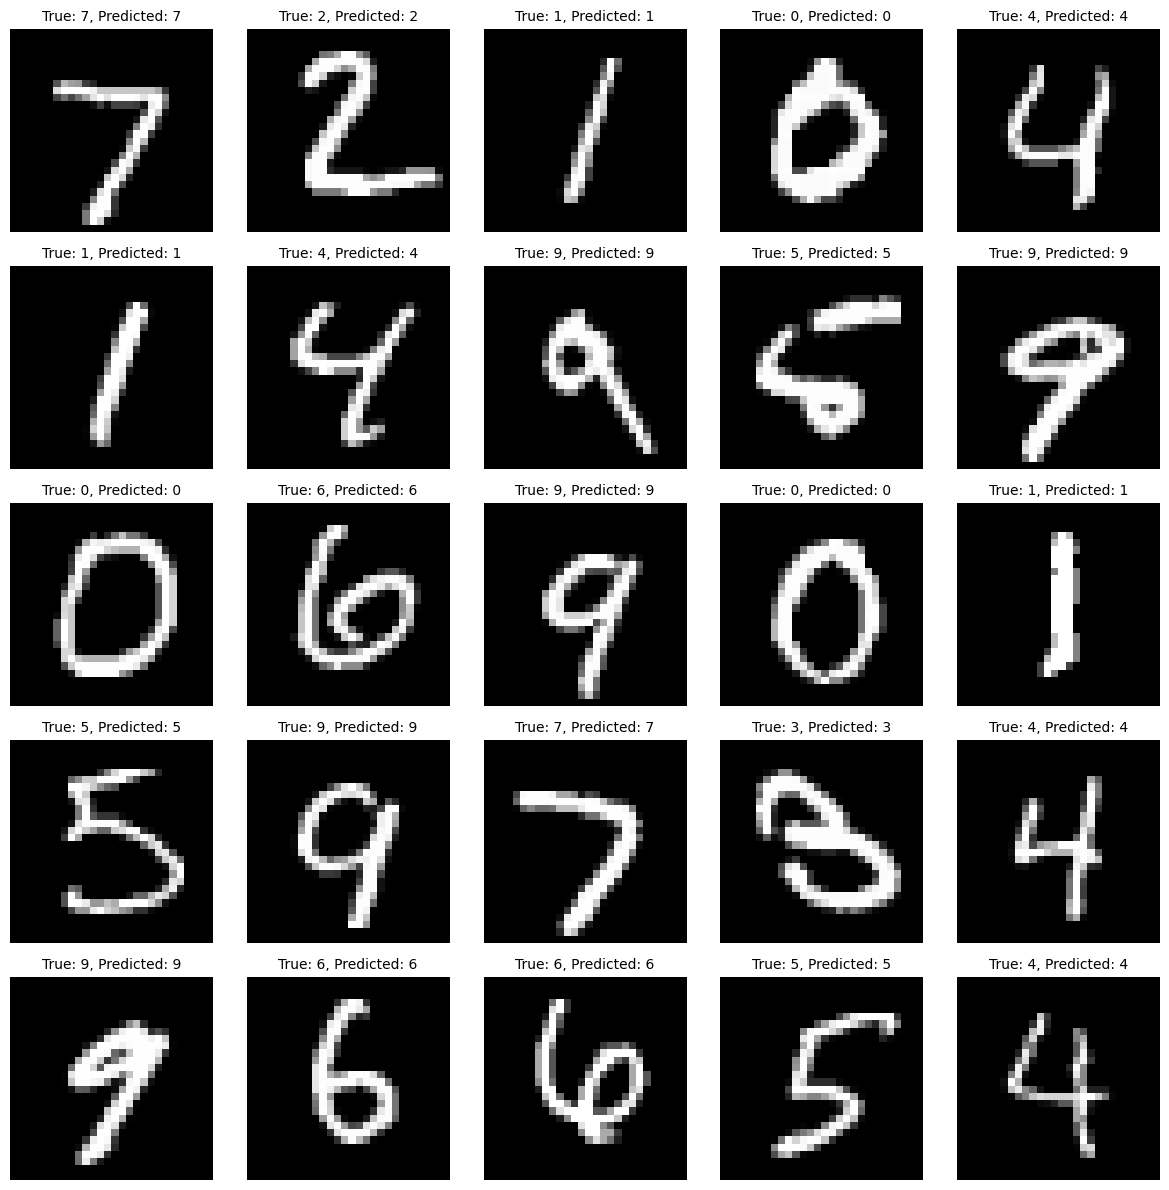

In [9]:
# Visualize classification results
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true[i]}, Predicted: {y_pred[i]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

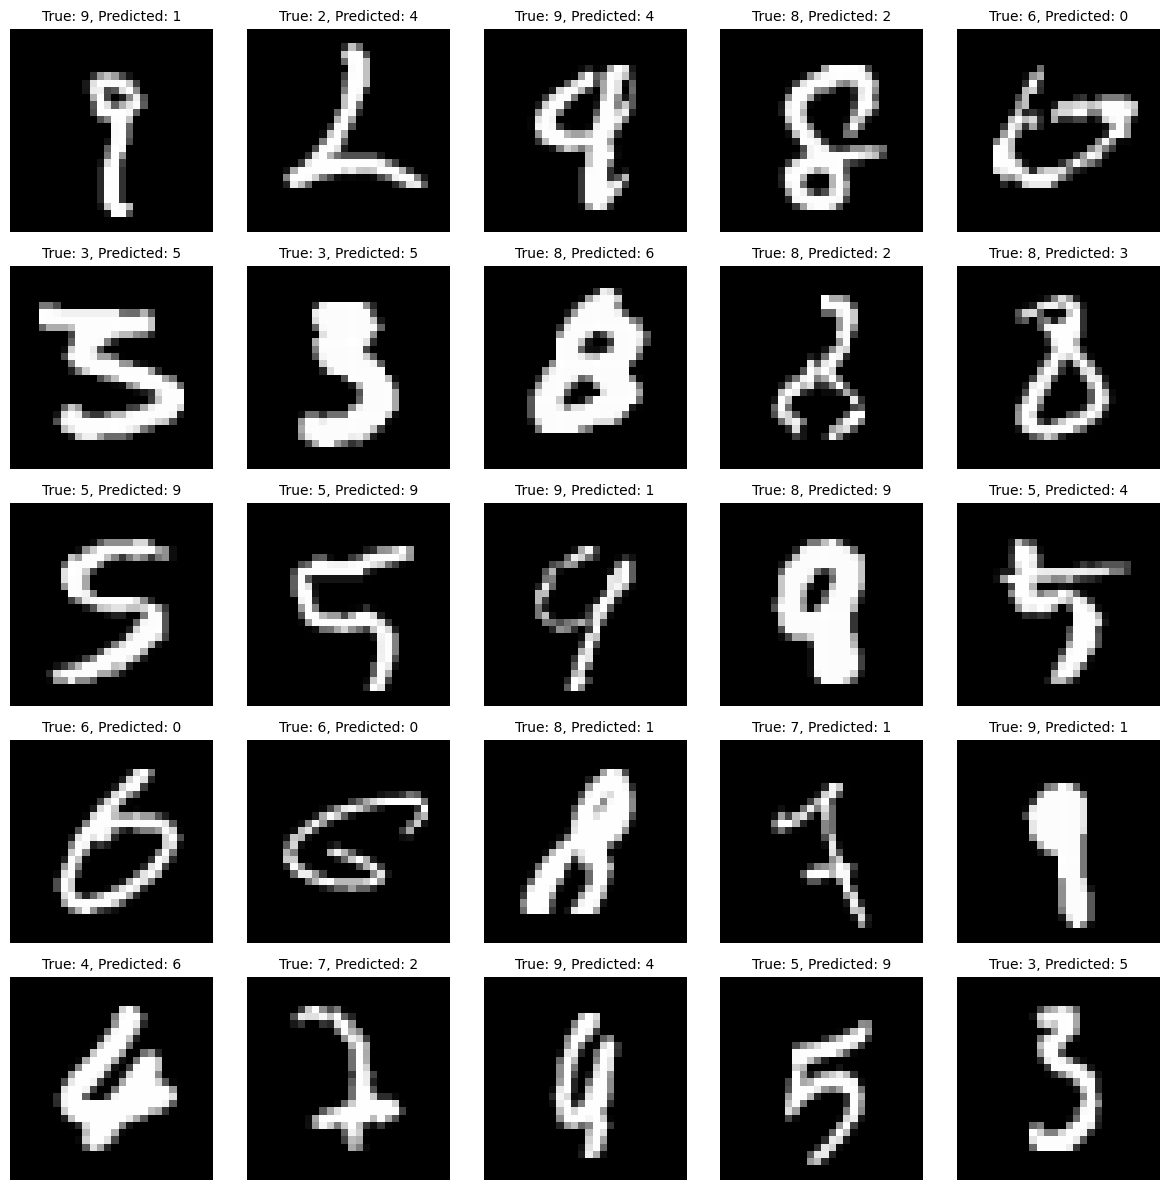

In [10]:
# Visualize misclassifications
misclassified_indices = np.where(y_pred != y_true)[0]
plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_true[idx]}, Predicted: {y_pred[idx]}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()